In [200]:
#I wanted to know how many points are required to qualify into the world cup in the CONMEBOL qualifications

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

YearsCup = [1998+4*i for i in range(7)] #World Cup Years
Top7= [i+1 for i in range(7)] #Top 7
url_list = [] #List to capture Wikipedia's URL for each year

for years in YearsCup:
    url_list.append("https://en.wikipedia.org/wiki/"+ str(years) + "_FIFA_World_Cup_qualification_(CONMEBOL)")

#Create a list with URLs with all world cups starting from 1998 BECAUSE that's when the existing format started to be used

In [212]:
HistTable = pd.DataFrame(index=range(7))  # Create an empty dataframe

#Webscrapping each year of Wikipedia. for the data
#In retrospective, since this was a small group of data probably this arrangement is too overkill compare to just
#using a notepad and writing it down or just using ChatGPT to gather the data. Nonetheless, I wanted to do use this

for index, url in enumerate(url_list):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
#Find the 'Standings' section
    standings_section = soup.find('span', {'id': 'Standings'}).parent
    
#Find the first table after the 'Standings' section
    table = standings_section.find_next('table')
    
#Read the table into a dataframe
    df = pd.read_html(str(table))[0]

#I had to create these conditions because one of the years does not get scrapped properly and
#work needs to be done.

    if 'Pts' in df.columns:
        df = df[['Pts']]
        df['Pts'] = df['Pts'].astype(int) #Got scrapped as strings
        df = df.iloc[0:7,:] #Just keeping the Top 7
    else:
        df = df.iloc[1:9,:10]  #manipulating the data that got scrapped 
        df.columns = list(df.loc[1,:10]) 
        df = df.drop(1,axis=0).reset_index()
        df = df.drop('index',axis=1)
        df = df[['Pts']]
        df['Pts'] = df['Pts'].str[0:2].astype(int) #Got scrapped as strings

    HistTable[f'{YearsCup[index]}'] = df['Pts'].values #Add the new data as a column in HistTable

HistTable=HistTable.T #Using the Transpose version because in this scenario, it is easy to handle.
HistTable.columns = Top7 

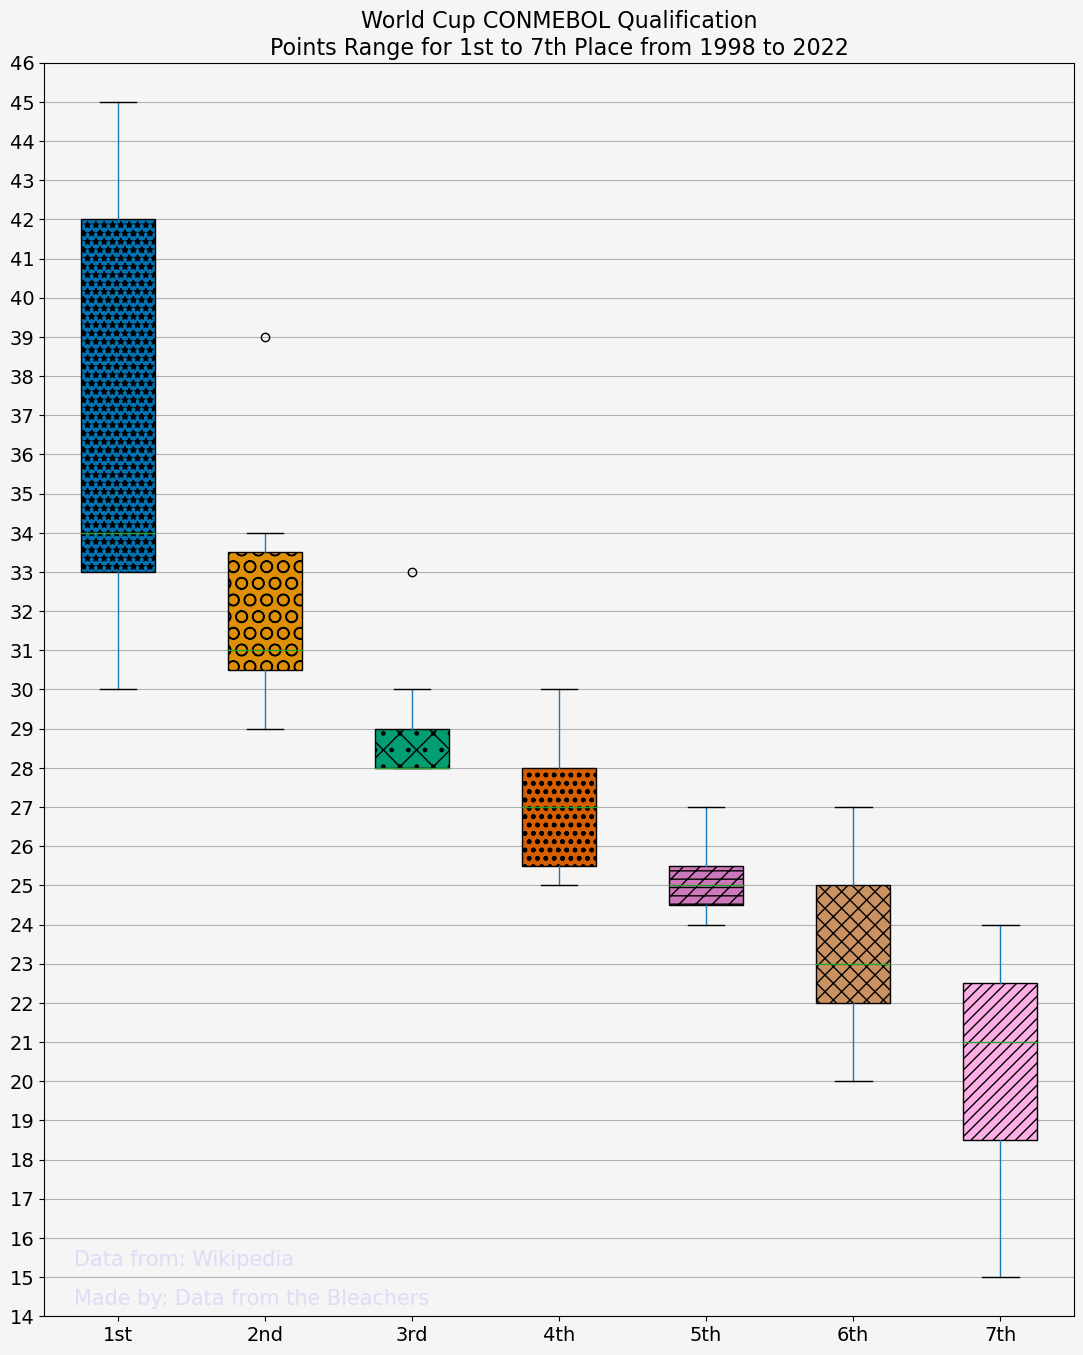

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the DPI of the figure. The standard DPI for a screen is 100.
dpi = 100

# Calculate the size of the figure in inches (width x height)
figsize = (13.28, 16.28)
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

#Background color 
ax.patch.set_facecolor('whitesmoke')
fig.patch.set_facecolor('whitesmoke')

# Create the boxplot
bp= HistTable.boxplot(ax=ax, column=Top7, patch_artist=True, return_type='dict')

ax.grid(axis='x')
ax.set_xticklabels(['1st', '2nd', '3rd','4th','5th','6th','7th'],fontsize=14)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_ylim([14,46])
ax.set_title('World Cup CONMEBOL Qualification\nPoints Range for 1st to 7th Place from 1998 to 2022', fontsize=16)
plt.text(0.7, 14.3, 'Made by: Data from the Bleachers', alpha=0.1, fontsize=15, color='blue')
plt.text(0.7, 15.3, 'Data from: Wikipedia', alpha=0.1, fontsize=15, color='blue')

hatches = ['*.*', 'O', 'x.', 'o.o.', '//--', 'xx', '///']  # Add more hatches if you have more boxes

# Use seaborn to get colorblind-friendly colors
colors = sns.color_palette('colorblind', len(bp['boxes']))  # Get as many colors as there are boxes

for patch, hatch in zip(bp['boxes'], hatches):
    patch.set_facecolor('none')
    patch.set_hatch(hatch)
    patch.set_edgecolor('k')  # Set the edge color to red

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)    

plt.yticks(np.arange(14,47, 1),fontsize=14)

# Show the plot
plt.show()